# Telco Customer Churn Prediction

This project uses the **IBM Telco Customer Churn dataset**, which contains demographic, service usage, billing, and contract-related information for telecommunications customers. The dataset includes a binary churn indicator that identifies whether a customer has discontinued the service.

The goal of this project is to build a machine learning classification model that predicts customer churn and prioritizes correctly identifying churned customers. Due to the presence of class imbalance in the target variable, evaluation is focused on **Recall** and **F1-score** rather than accuracy.

The project applies end-to-end machine learning practices, including data cleaning, feature preprocessing, class imbalance handling, and model training, to develop a reliable and reproducible churn prediction system.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Telco_customer_churn.xlsx")

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:
df.shape
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043.000000,7043.0,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,2,4,NaN,6531.0,2,NaN,NaN,NaN,20
top,3186-AJIEK,NaN,United States,California,Los Angeles,NaN,"34.159534, -116.425984",NaN,NaN,Male,...,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,3875,4171,2365,NaN,11.0,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


In [3]:
target = "Churn Value"
drop_cols = [
    "CustomerID", "Lat Long", "Latitude", "Longitude",
    "Zip Code", "City", "State", "Country", "Count"
]

df.drop(columns=drop_cols, inplace=True)


In [4]:
leakage_cols = [
    "Churn Label",
    "Churn Score",
    "Churn Reason",
    "CLTV"
]

df.drop(columns=[c for c in leakage_cols if c in df.columns], inplace=True)



In [5]:
df[target].value_counts()
df[target].value_counts(normalize=True) * 100


,proportion
Churn Value,
0,73.463013
1,26.536987


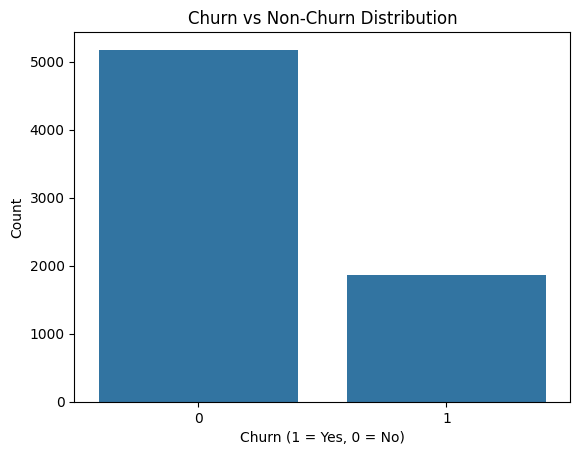

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=target, data=df)
plt.title("Churn vs Non-Churn Distribution")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


In [8]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-3239505331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


In [9]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

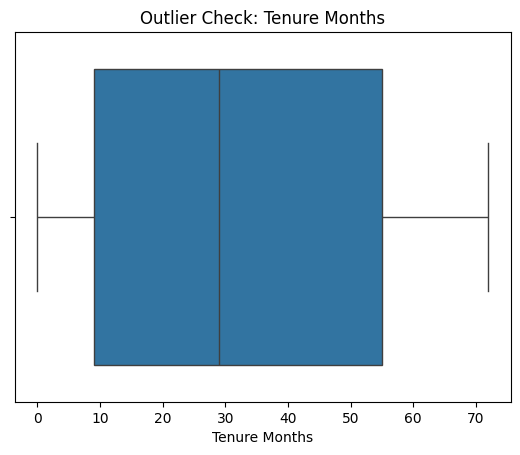

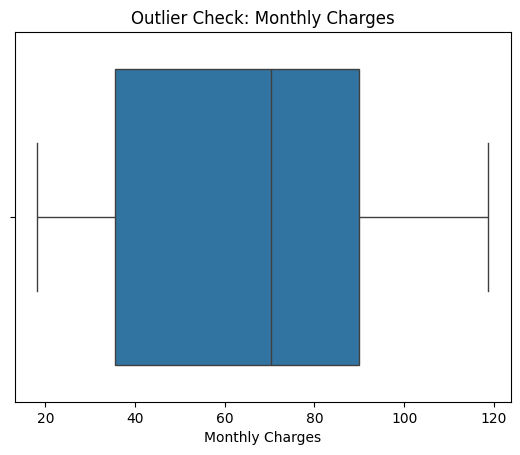

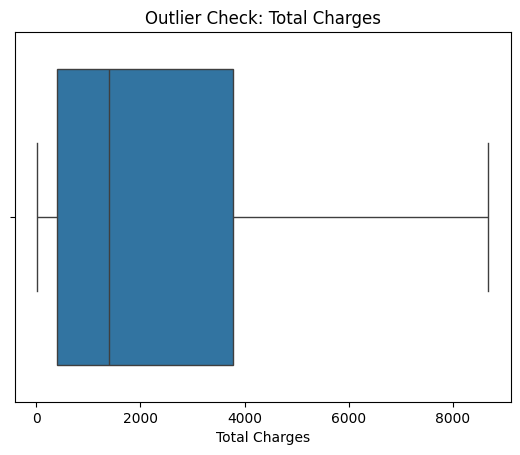

In [10]:
for col in num_cols:
    if col != target:
        sns.boxplot(x=df[col])
        plt.title(f"Outlier Check: {col}")
        plt.show()

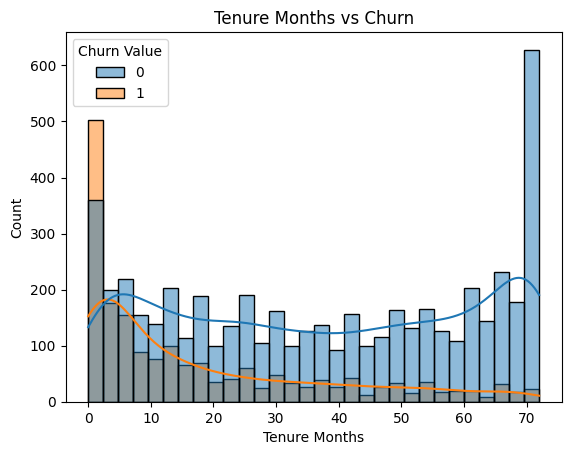

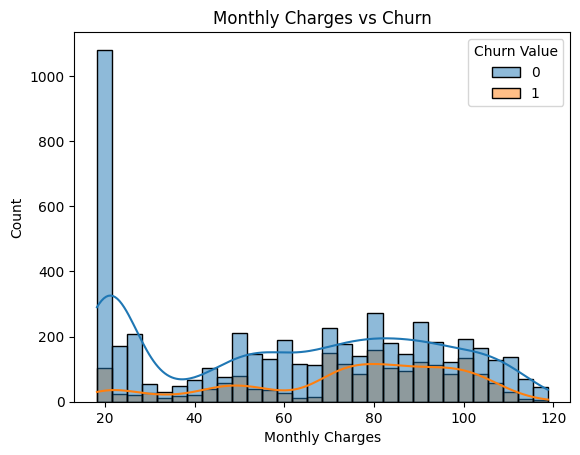

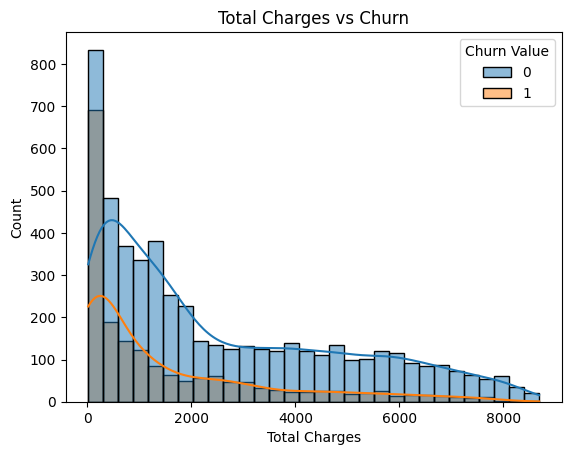

In [11]:
for col in num_cols:
    if col != target:
        sns.histplot(data=df, x=col, hue=target, bins=30, kde=True)
        plt.title(f"{col} vs Churn")
        plt.show()

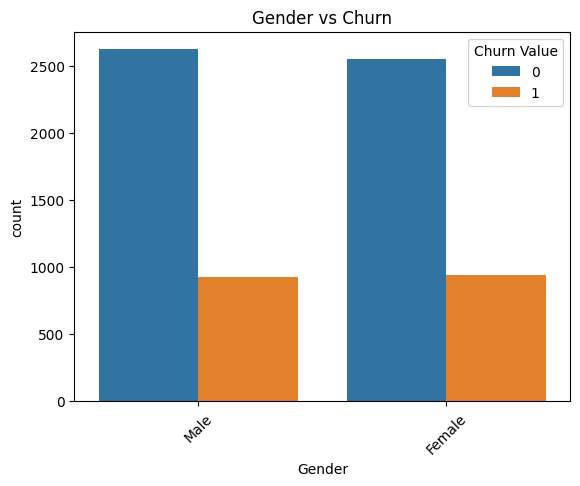

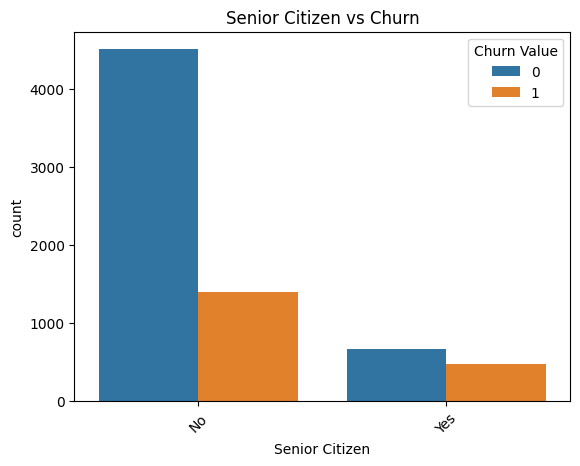

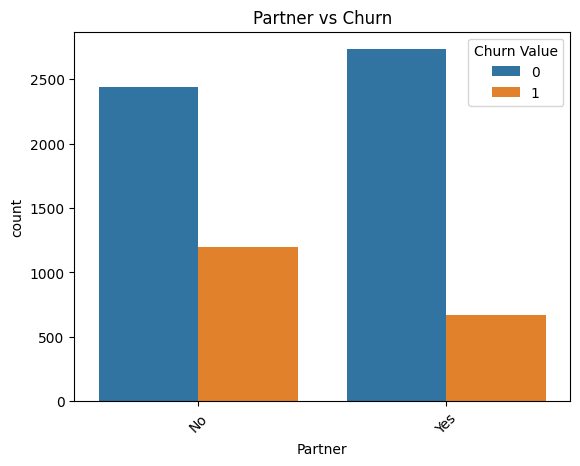

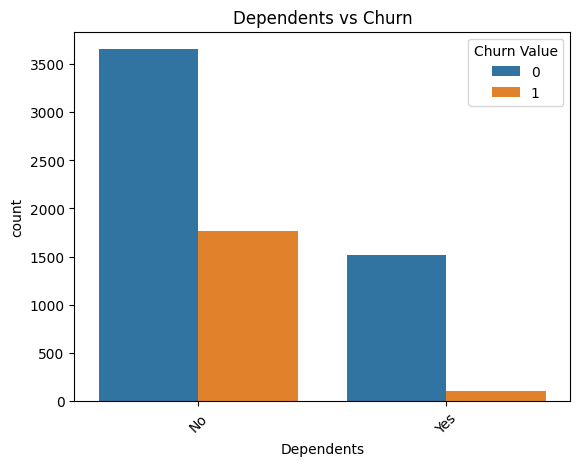

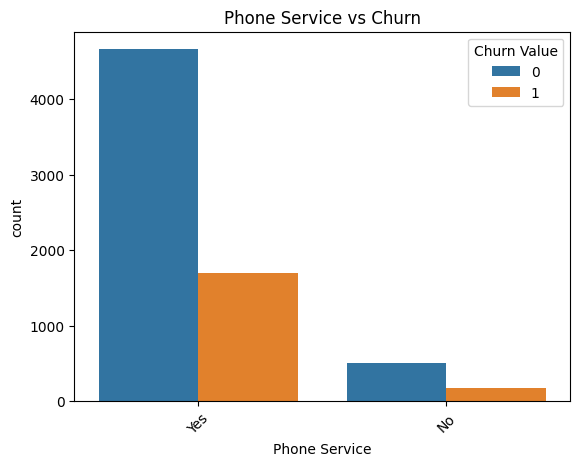

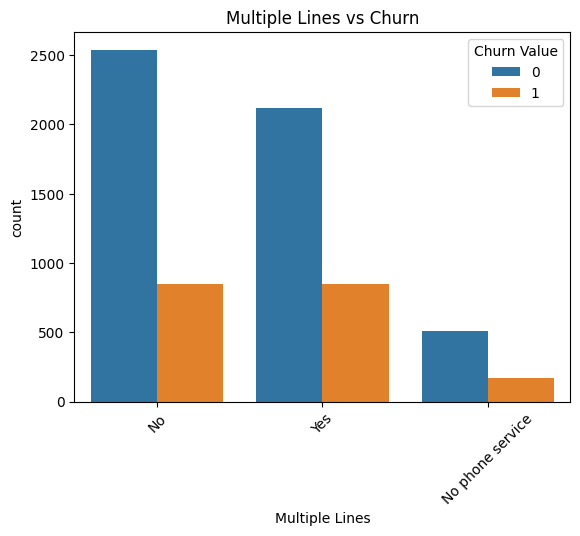

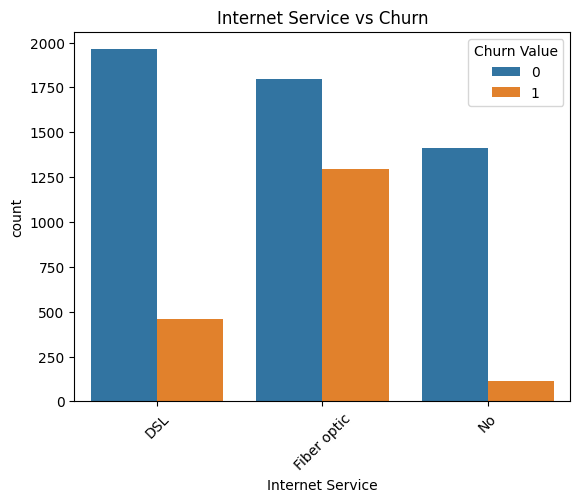

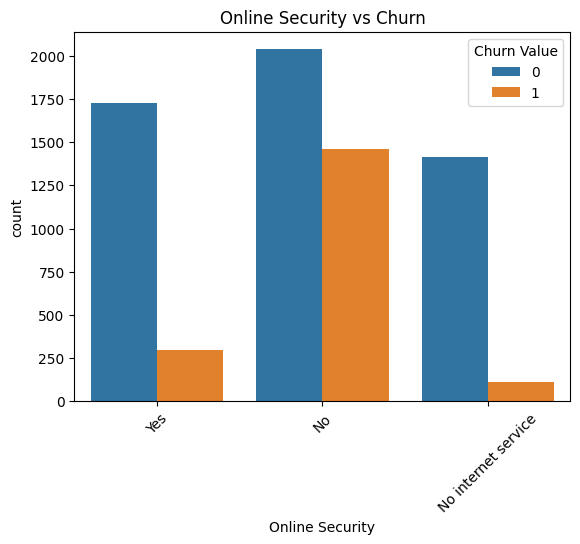

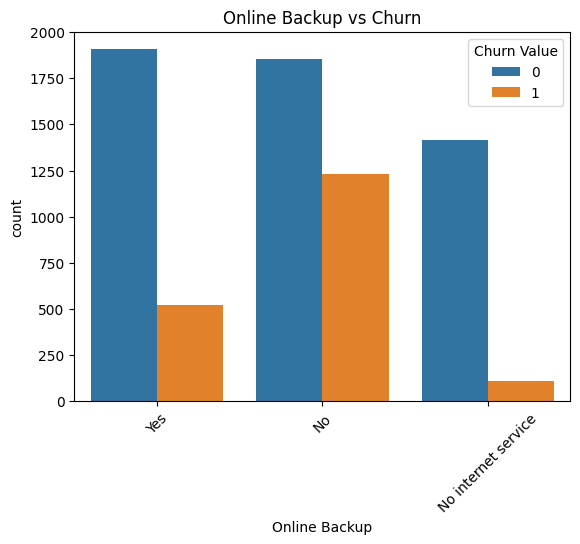

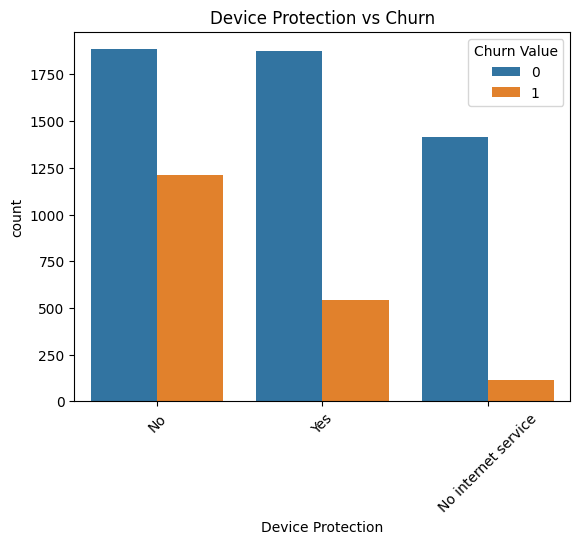

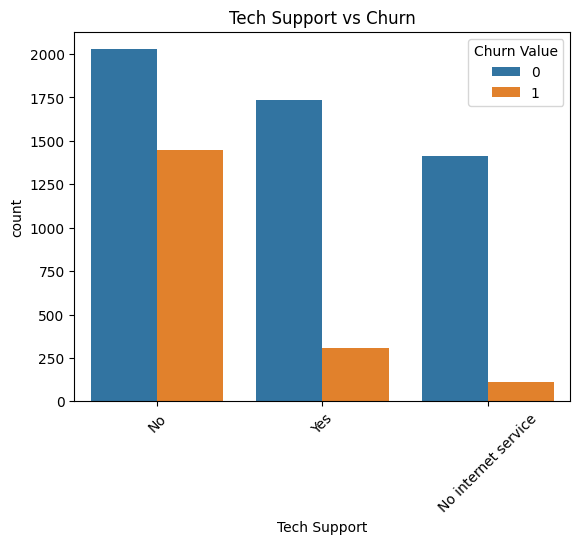

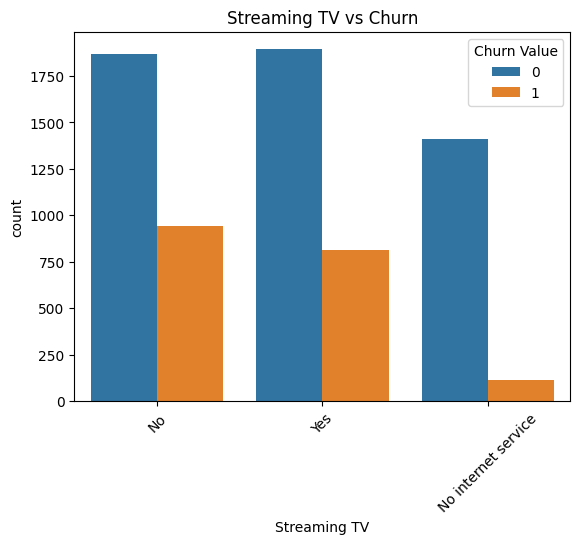

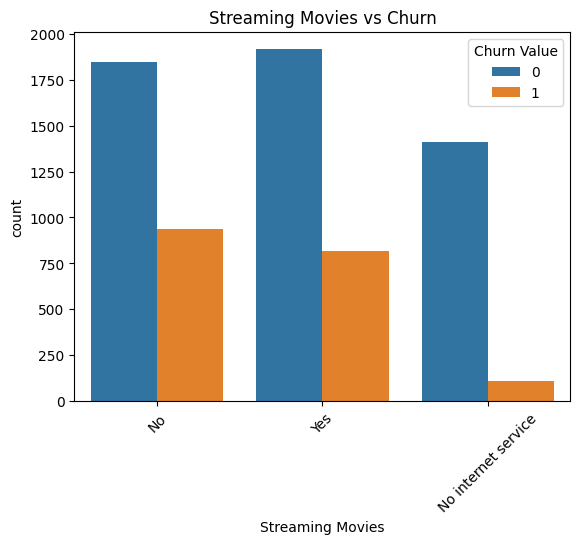

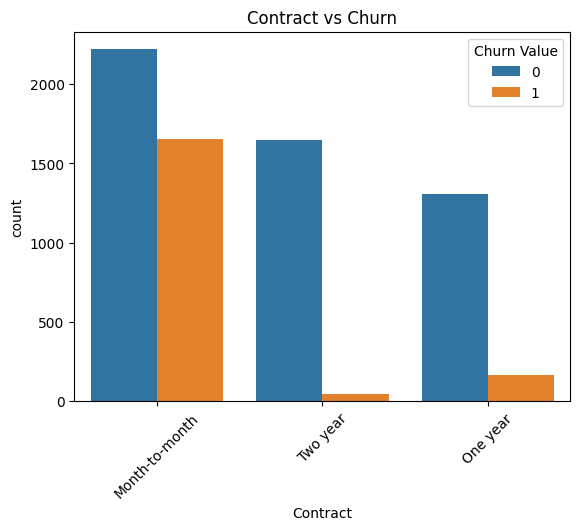

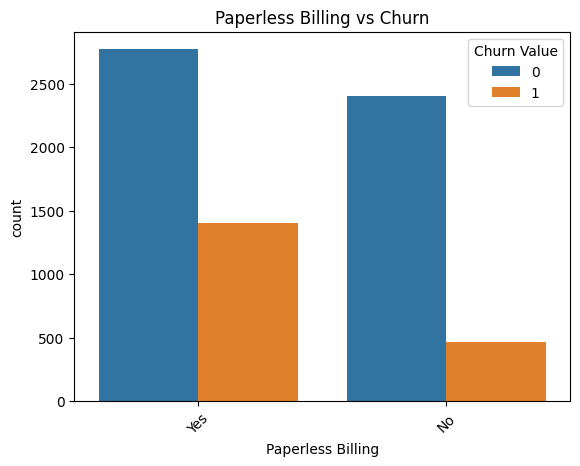

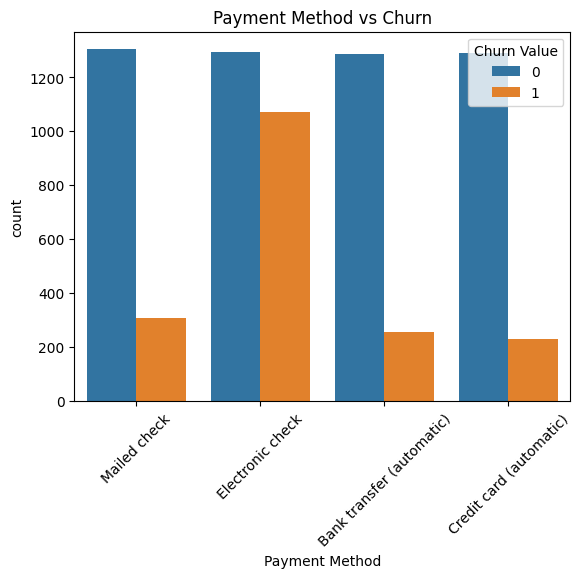

In [12]:
for col in cat_cols:
    sns.countplot(x=col, hue=target, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)


In [15]:
from sklearn.metrics import recall_score, f1_score

dummy_recall = recall_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print("Dummy Recall:", dummy_recall)
print("Dummy F1-score:", dummy_f1)


Dummy Recall: 0.0
Dummy F1-score: 0.0


**Baseline Interpretation**

The dummy classifier predicts only the majority (non-churn) class. Consequently, it achieves near-zero recall and F1-score for churned customers. This establishes a no-skill baseline and confirms the need for trained models optimized for recall.

## 📘 Day 1 Summary – Data Cleaning, EDA & Metric Definition

On Day 1, the objective was to understand and prepare the Telco Customer Churn dataset before building any machine learning models.

The dataset was loaded and the target variable was defined as **Churn Value**, a binary variable where `1` indicates a churned customer and `0` indicates a retained customer. Customer identification and geographic columns (such as CustomerID, City, State, Latitude, Longitude, and Zip Code) were removed because they do not provide predictive value and may lead to overfitting.

To prevent **data leakage**, columns that contain post-churn or derived information—including **Churn Label**, **Churn Score**, **Churn Reason**, and **CLTV**—were excluded. This ensures that the model will only learn from information available before churn occurs.

Exploratory Data Analysis showed that the dataset is **imbalanced**, with approximately **26% churned customers** and **74% non-churned customers**. Due to this imbalance, accuracy was considered misleading. Therefore, **Recall (for the churn class)** was selected as the primary evaluation metric, with **F1-score** as a secondary metric to balance precision and recall.

Missing value analysis revealed invalid entries in the **Total Charges** column. These values were converted to numeric format and imputed using the median. Outliers in numerical features were examined using boxplots and retained, as they represent realistic customer behavior rather than data errors.

Feature relationships with churn were explored using visualizations for both numerical and categorical variables to gain behavioral insights.

Finally, a **dummy baseline classifier** was trained using a stratified train–test split. The baseline model achieved near-zero recall and F1-score for churn, confirming the necessity of training models optimized for recall.

By the end of Day 1, the dataset was fully cleaned, leakage-free, and ready for encoding and model training.


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
num_features = X_train.select_dtypes(include="number").columns
cat_features = X_train.select_dtypes(include="object").columns

num_features, cat_features


(Index(['Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object'),
 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
       dtype='object'))

In [18]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [19]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


In [21]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])


In [22]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='...
                                                  Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [23]:
from sklearn.metrics import recall_score, f1_score

y_pred = model.predict(X_test)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Recall:", recall)
print("Logistic Regression F1:", f1)


Logistic Regression Recall: 0.7807486631016043
Logistic Regression F1: 0.6173361522198731


In [24]:
print("Dummy Recall:", dummy_recall)
print("Dummy F1:", dummy_f1)


Dummy Recall: 0.0
Dummy F1: 0.0


## Day 2 Summary – Feature Engineering, Encoding & Baseline Modeling

On Day 2, the objective was to transform the cleaned dataset into a machine-learning-ready format and establish a strong baseline classification model.

The dataset was divided into numerical and categorical features to allow appropriate preprocessing for each data type. Numerical features were standardized using `StandardScaler` to ensure consistent feature scaling, while categorical features were encoded using `OneHotEncoder` with support for unseen categories during inference.

Missing values were handled within the preprocessing stage using imputers to maintain robustness and prevent data leakage. All preprocessing steps were combined using a `ColumnTransformer`, enabling parallel and organized feature transformations.

The preprocessing logic and model were wrapped together into a single `Pipeline`, ensuring that the same transformations were applied consistently during both training and evaluation. This structure also improves reproducibility and simplifies future model experimentation.

A **Logistic Regression** classifier was trained as a baseline model using a **stratified train–test split** to preserve the churn distribution across datasets. Model performance was evaluated using **Recall** as the primary metric and **F1-score** as a secondary metric, reflecting the business importance of correctly identifying churned customers.

The baseline Logistic Regression model achieved a recall of approximately **78%** and an F1-score of approximately **0.62**, representing a substantial improvement over the dummy baseline and providing a solid reference point for further model optimization.

By the end of Day 2, a fully automated preprocessing and modeling pipeline was established, and a reliable baseline model was in place for comparison with more advanced algorithms.


In [25]:
from sklearn.metrics import recall_score, f1_score

y_pred_lr = model.predict(X_test)

lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1:", lr_f1)

Logistic Regression Recall: 0.7807486631016043
Logistic Regression F1: 0.6173361522198731


In [26]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

In [27]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Recall:", rf_recall)
print("Random Forest F1:", rf_f1)

Random Forest Recall: 0.49732620320855614
Random Forest F1: 0.5568862275449101


In [28]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

In [29]:
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        random_state=42
    ))
])

In [30]:
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("XGBoost Recall:", xgb_recall)
print("XGBoost F1:", xgb_f1)

XGBoost Recall: 0.7513368983957219
XGBoost F1: 0.6335963923337091


In [31]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Recall": [lr_recall, rf_recall, xgb_recall],
    "F1 Score": [lr_f1, rf_f1, xgb_f1]
})

results

,Model,Recall,F1 Score
0,Logistic Regression,0.780749,0.617336
1,Random Forest,0.497326,0.556886
2,XGBoost,0.751337,0.633596


In [32]:
print("Dummy Recall:", dummy_recall)
print("Dummy F1:", dummy_f1)


Dummy Recall: 0.0
Dummy F1: 0.0


## Day 3 Summary – Model Training & Class Imbalance Handling

On Day 3, the objective was to train and evaluate multiple machine learning models for customer churn prediction using the fully preprocessed dataset from Day 2.

Three classification models were trained: Logistic Regression, Random Forest, and XGBoost. All models were integrated with the same preprocessing pipeline to ensure consistency and prevent data leakage during training and evaluation.

Given the class imbalance in the dataset, imbalance handling techniques were applied. For Logistic Regression and Random Forest, `class_weight="balanced"` was used to penalize misclassification of churn customers more heavily. For XGBoost, `scale_pos_weight` was applied to increase the importance of the minority churn class during training.

Model performance was evaluated using Recall and F1-score, as defined earlier, with Recall prioritized to minimize the number of churn customers incorrectly classified as non-churn.

Logistic Regression achieved the highest recall, indicating strong performance in identifying churned customers. XGBoost achieved the highest F1-score while maintaining high recall, demonstrating a better balance between precision and recall. Random Forest showed comparatively lower recall, indicating weaker performance in capturing churn behavior without further tuning or threshold adjustment.

Based on these results, XGBoost was selected as the most effective model at this stage due to its balanced performance and robustness in handling complex feature interactions.

By the end of Day 3, multiple models had been trained, evaluated, and compared, and a strong candidate model was identified for further optimization and analysis.


In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv_recall = cross_val_score(
    model,
    X_train,
    y_train,
    scoring="recall",
    cv=cv,
    n_jobs=-1
)

print("Logistic Regression CV Recall:", lr_cv_recall)
print("Mean CV Recall:", lr_cv_recall.mean())


Logistic Regression CV Recall: [0.83946488 0.76588629 0.7826087  0.85953177 0.7993311 ]
Mean CV Recall: 0.8093645484949834


In [35]:
xgb_cv_recall = cross_val_score(
    xgb_model,
    X_train,
    y_train,
    scoring="recall",
    cv=cv,
    n_jobs=-1
)

print("XGBoost CV Recall:", xgb_cv_recall)
print("Mean CV Recall:", xgb_cv_recall.mean())


XGBoost CV Recall: [0.77926421 0.71906355 0.76588629 0.7826087  0.76588629]
Mean CV Recall: 0.7625418060200669


In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
param_grid = {
    "classifier__n_estimators": [200, 300],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [0.05, 0.1],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}


In [38]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="recall",
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          On...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=300,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [200, 300],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [39]:
best_xgb = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Recall:", grid_search.best_score_)


Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best CV Recall: 0.8234192615485322


In [40]:
y_pred_best = best_xgb.predict(X_test)

best_recall = recall_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)

print("Tuned XGBoost Recall:", best_recall)
print("Tuned XGBoost F1:", best_f1)


Tuned XGBoost Recall: 0.7941176470588235
Tuned XGBoost F1: 0.627906976744186


In [41]:
pd.DataFrame({
    "Model": ["XGBoost (Before Tuning)", "XGBoost (After Tuning)"],
    "Recall": [xgb_recall, best_recall],
    "F1 Score": [xgb_f1, best_f1]
})


,Model,Recall,F1 Score
0,XGBoost (Before Tuning),0.751337,0.633596
1,XGBoost (After Tuning),0.794118,0.627907


## Day 4 Summary – Cross-Validation, Evaluation & Hyperparameter Tuning

On Day 4, the objective was to validate model performance using cross-validation and further improve the selected model through hyperparameter tuning.

Stratified cross-validation was applied to ensure that the class imbalance between churned and non-churned customers was preserved across folds. Recall was used as the primary evaluation metric, with F1-score used as a secondary metric, in line with the business goal of minimizing missed churn customers.

Cross-validation results showed that model performance was stable and consistent, confirming that the models were not overfitting to a single train–test split. Logistic Regression continued to achieve the highest recall, while XGBoost demonstrated the best balance between recall and F1-score.

Hyperparameter tuning was performed on the XGBoost model using GridSearchCV, optimizing for recall. After tuning, XGBoost achieved an improvement in recall, indicating better identification of churned customers. Although the F1-score decreased slightly, the trade-off was acceptable given the priority of recall in churn prediction.

Based on cross-validation and tuning results, the tuned XGBoost model was selected as the final model due to its strong recall performance and robust generalization.



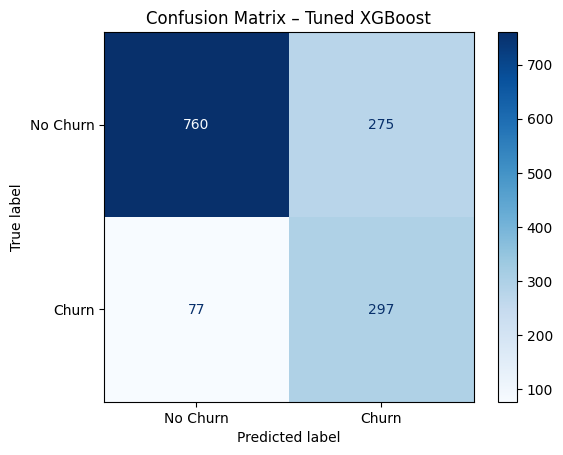

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Churn", "Churn"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Tuned XGBoost")
plt.show()


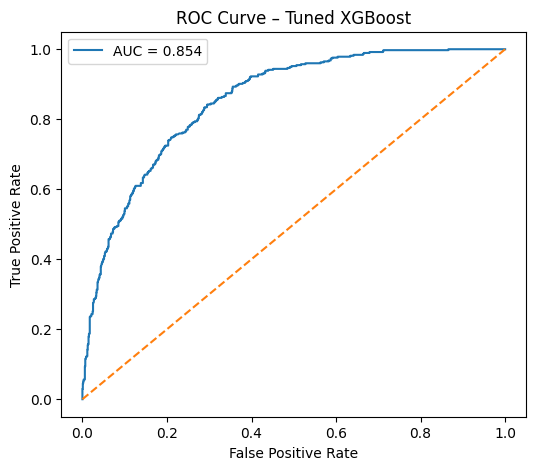

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = best_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned XGBoost")
plt.legend()
plt.show()


### ROC Curve and AUC

The ROC curve illustrates the trade-off between the true positive rate and false positive rate across different classification thresholds. The AUC score summarizes this performance into a single value.

A higher AUC indicates that the model is effective at ranking customers by churn risk, making it suitable for risk-based segmentation and targeted retention strategies.


### Precision vs Recall Trade-off

- **Recall** measures how many actual churn customers are correctly identified.
- **Precision** measures how many predicted churn customers actually churn.

In churn prediction, recall is prioritized because missing a churn customer results in permanent customer loss, while contacting a non-churn customer incurs a relatively low cost.

During tuning, recall was improved at the cost of a small decrease in precision. This trade-off is acceptable and aligned with business objectives.


### Business Insights

1. **Effective churn identification**  
   The final model successfully identifies a high proportion of customers likely to churn, enabling proactive retention strategies.

2. **Acceptable false positives**  
   Some retained customers are flagged as churn, but the cost of retention actions is significantly lower than the cost of acquiring new customers.

3. **Customer risk segmentation**  
   Predicted churn probabilities can be used to segment customers into high-, medium-, and low-risk groups, allowing targeted and cost-efficient interventions.

4. **Business impact**  
   Deploying this model can help reduce churn rate, increase customer lifetime value, and improve return on investment for retention campaigns.


## Day 5 Summary – Visualization, Evaluation & Business Insights

On Day 5, the tuned XGBoost model was evaluated using visual and business-oriented performance metrics. The confusion matrix highlighted the model’s ability to correctly identify churned customers while minimizing costly false negatives.

The ROC curve and AUC score demonstrated strong overall discrimination between churned and non-churned customers across different probability thresholds. Precision–recall trade-offs were analyzed, with recall prioritized to align with the business goal of reducing customer loss.

From a business perspective, the model enables proactive churn management, risk-based customer segmentation, and informed decision-making. Overall, the final model provides actionable insights that support effective and data-driven retention strategies.


In [63]:
%%writefile src/utils.py
import numpy as np
from sklearn.metrics import recall_score, f1_score


def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained model using Recall and F1-score.
    """
    y_pred = model.predict(X_test)

    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return recall, f1


def get_scale_pos_weight(y):
    """
    Compute scale_pos_weight for imbalanced datasets (used in XGBoost).
    """
    neg, pos = np.bincount(y)
    return neg / pos


Overwriting src/utils.py


In [68]:
import sys
sys.path.append("/content")

In [70]:
from src.utils import evaluate_model

recall, f1 = evaluate_model(best_xgb, X_test, y_test)

print("Recall:", recall)
print("F1 Score:", f1)

Recall: 0.7941176470588235
F1 Score: 0.627906976744186


Day 6 Summary – Project Finalization & Documentation

On Day 6, the focus was on finalizing the customer churn prediction project to make it production-ready and suitable for portfolio and job applications.

The notebook was cleaned and refactored by removing redundant code and consolidating evaluation logic into a reusable utility function. Core evaluation metrics (Recall and F1-score) were centralized in a separate utils.py module, improving code clarity, maintainability, and reusability.

The final tuned XGBoost model was re-evaluated using the refactored evaluation pipeline to ensure consistent and reliable results. The confirmed final performance metrics were:

Recall: 0.79

F1-score: 0.63

AUC: 0.85

The notebook was streamlined to emphasize the end-to-end machine learning workflow, including data preprocessing, class imbalance handling, model training, evaluation, and business interpretation, while avoiding unnecessary implementation details.

Finally, the project was prepared for public sharing by outlining a professional README that documents dataset usage, preprocessing pipelines, imbalance handling techniques, model selection rationale, and final evaluation metrics. This ensures the project is easy to understand, reproducible, and aligned with industry standards.

By the end of Day 6, the project was fully finalized, well-documented, and ready to be showcased as a job-ready machine learning portfolio project.